# Bellman Ford

Bellman Ford is an algorithm that takes in a graph with (possibly negative) edge weights and a starting vertex v and returns the length of the shortest path from v to all other vertices. If there is a negative cycle, then it will return the message "negative cycle".

In the following implementation of Bellman Ford, we will be using an adjacency matrix. The value of the [i,j] cell of the matrix is the weight of the edge that connects vertex i to vertex j. If there is no edge between vertex i and vertex j, then we would like to set that value to 'X'.

In [ ]:
import numpy as np
from pandas import *

In [ ]:
def Bellman_Ford(G,starting_index):
    """G is an adjacency matrix with positive, zero or negative edge weights. cell G[i,j] = 'X' if there is no edge from i to j. Edges not in the graph are given the weight of 10^6 which will be a makeshift infinity"""
    inf = 10000                                   #this is just some large number that will essentially act as infinity
    si = starting_index
    n = len(G)                                       #this is the number of vertices of G
    B = [[0]*(n) for i in range(n)]              #this initializes the DP array called B which has rows numbered 0 to n-1 and columns numbered 0 to n-1
                                                    #B[i,t] is the length of the shortest path from vertex starting_index to vertex i using t or fewer edges.
    prev = [['null']*(n) for i in range(n)]           #this will initialize a prev array to all 0's which is just a place holder for now.
    for i in range(n):                             #this initializes B[i,0]=inf meaning that the shortest path from starting_index to i using 0 edges is infinity
        B[i][0] = inf
    B[si][0] = 0                               #the shortest path from starting_index to starting_index using 0 edges is 0 from the                                      
   
    for t in range(1,n):
        for i in range(n):
            C = inf                                     #C will be the variable we use to compute the running minimum. We will start it out at a large number.
            for j in range(n):
                if G[j][i] != 'X':
                    if C > B[j][t-1] + G[j][i]:            #this checks to see if the current shortest path from starting_index to i is longer than the path that goes through j
                        prev[i][t] = j                   #update prev
                        C = B[j][t-1] + G[j][i]            #update C
            if C < B[i][t-1]:
                B[i][t] = C
            else:
                B[i][t] = B[i][t-1]
                prev[i][t] = prev[i][t-1]
                                                              #set the value for B[i,t] and prev[i,t]
    for i in range(n):
        if B[i][n-2] != B[i][n-1]:
            
            print("negative cycle!",i)                 #if any of the vertices changed their length after from t=n-1 to t=n, then there must be a negative cycle.
    return ([B[k][n-1] for k in range(n)],[prev[k][n-1] for k in range(n)])

Here is an example graph to try it on:

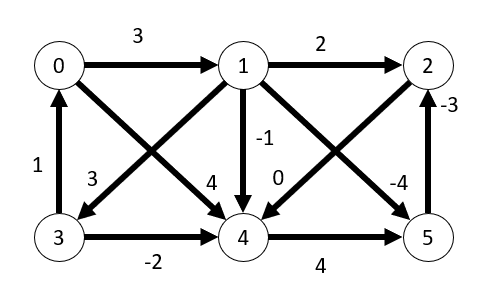



In [ ]:

G_example_1 = [['X',3,'X','X',4,'X'],
            ['X','X',2,3,-1,-4],
            ['X','X','X','X',0,'X'],
            [1,'X','X','X',-2,'X'],
            ['X','X','X','X','X',4],
            ['X','X',-3,'X','X','X']]
DataFrame(G_example_1)

We can use DataFrame feature of pandas to make the adjacency matrix a little easier to look at.

When we run Bellman_Ford on the example starting at 0, it will return two arrays. The first array is the lengths of the shortest paths for vertices 0,1,2,3,4,5 and the second array is the previous pointers so that you can reconstruct the path.

In [ ]:
Bellman_Ford(G_example_1,0)

Exercise 1:

What is the length of the shortest path from 0 to 5 in G_example_1?

Now, let's change the edge from 2 to 4 to be weighted with -2 rather than a 0. Then what do you think will happen?

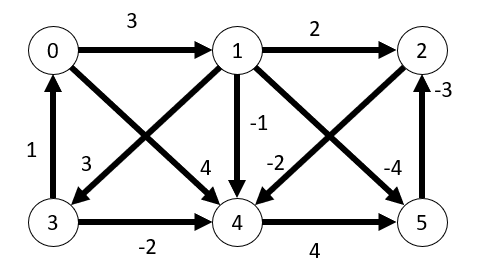

In [ ]:

G_example_2 = [['X',3,'X','X',4,'X'],
            ['X','X',2,3,-1,-4],
            ['X','X','X','X',-2,'X'],
            [1,'X','X','X',-2,'X'],
            ['X','X','X','X','X',4],
            ['X','X',-3,'X','X','X']]
DataFrame(G_example_2)

In [ ]:
Bellman_Ford(G_example_2,0)

# Currency Arbitrage

A currency arbitrage is a way to make money from a sequence of two or more currency exchanges. Since the values of currency change on a daily basis and there is no central system that manages the values of the worlds currencies, each exchange house must update their own exchange rates. Because of different time zones, subtle market fluctuations and spread of information, some exchange houses will update faster than others and may create an *arbitrage*.

An *arbitrage* (in terms of currency exchanges) is a sequence of trades that start and end with the same currency and the ending value is greater than the starting value.

Here is an example of a currency arbitrage with two currencies. Suppose that Bank A exchanges 1 dollar for 0.75 euros (0.75 &euro;/\\$ ) and Bank B exchanges 1 euro for 1.5 dollars (1.5 \\$/&euro;). Then you could bring 1 dollar to Bank A and have it exchanged to 0.75 euros. Then take the 0.75 euros to Bank B and have them exchanged to (0.75)(1.5) = 1.125 dollars. You have made a profit of 0.125 dollars.

In this notebook, you will be given the exchange rates between many currencies (labeled 0,1,...). It is your job to find the *arbitrage* by possibly modifiying the algorithms or modifying the input data.

Below is the input data ER that tells you the exchange rates between 7 different currencies (currency 0, currency 1, ...)

In [ ]:
ER = [[1,
  0.88421157,
  111.728826,
  0.75912408,
  1.0048994999999998,
  1.3438656,
  1.4221577699999999],
 [1.13068692,
  1,
  126.34296444,
  0.8584141500000001,
  1.13638635,
  1.51964802,
  1.60813917],
 [0.00889911,
  0.00789921,
  1,
  0.006799319999999999,
  0.0089991,
  0.0119988,
  0.01269873],
 [1.31706828,
  1.16468352,
  147.16918161,
  1,
  1.3236676200000002,
  1.77042294,
  1.87321266],
 [0.9949005,
  0.87981201,
  111.17298159,
  0.75532446,
  1,
  1.33556643,
  1.4150584800000001],
 [0.74382561,
  0.6578342100000001,
  83.11918725,
  0.5647435199999999,
  0.74762523,
  1,
  1.05799419],
 [0.7030296899999999,
  0.62173782,
  78.55654356000001,
  0.5337466200000001,
  0.70652934,
  0.9450054900000001,
  1]]

DataFrame(ER)

Exercise 2:

Find an arbitrage in the exchange rates given by the matrix ER that includes currency 0.

(Write your arbitrage as a cycle for example: "(0,4,2,5)" meaning that you first exchange currency 0 for currency 4, then exchange for currency 2, then exchange for currency 5 and then back to currency 0.) 

(Hint: you may want to make a new matrix that takes the negative log of each cell.)
